Note: you may need to restart the kernel to use updated packages.
Dataset shape: (95662, 16)

Column types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


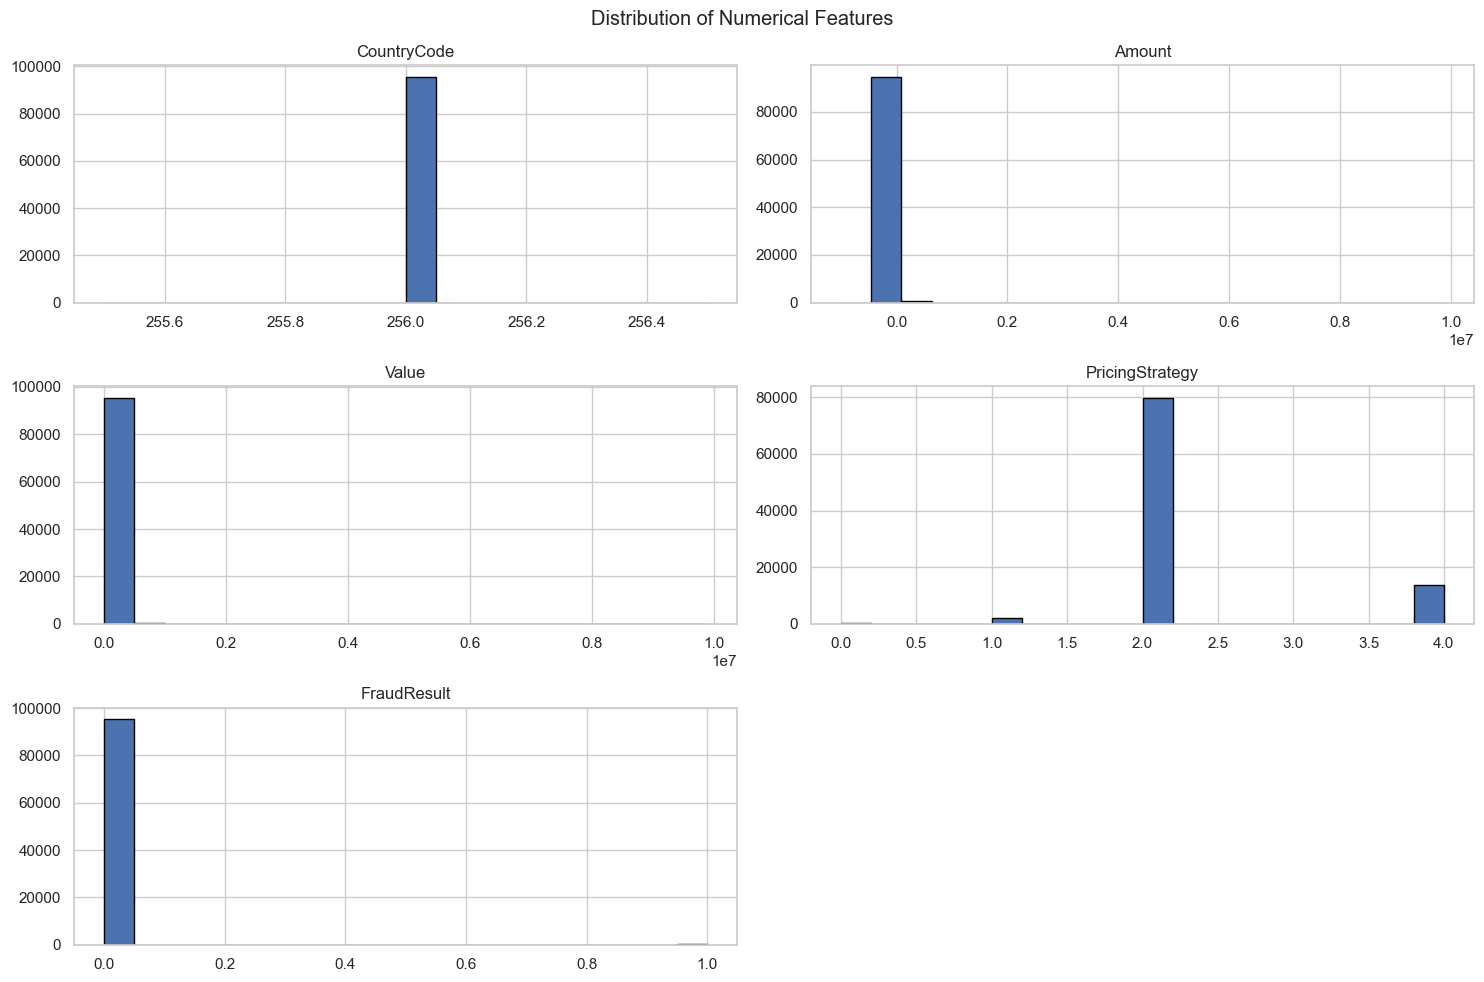

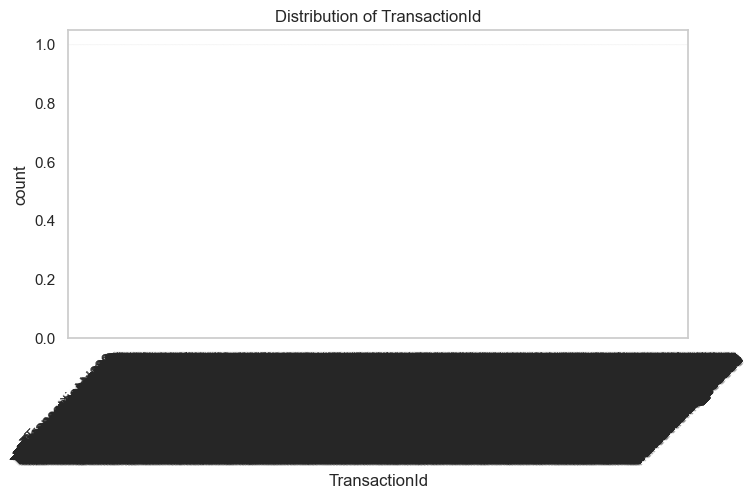

In [ ]:
# Import libraries
%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
df = pd.read_csv(r'C:\Users\Yohanan\credit-risk-model\data\raw\data.csv') 
# Shape and data types
print("Dataset shape:", df.shape)
print("\nColumn types:\n", df.dtypes)

# Preview the first few rows
df.head()
# Summary statistics for numerical features
df.describe()

# Summary for categorical features
df.describe(include='object')
# Plot histograms for numerical features
df.select_dtypes(include=np.number).hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()
# Bar plots for categorical features
categorical_features = df.select_dtypes(include='object').columns

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
# Correlation matrix
correlation = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# Total missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Display
print("Missing values per column:\n", missing)

# Visualize missing data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
# Box plots for numerical features
num_cols = df.select_dtypes(include=np.number).columns
df.to_csv(r'C:\Users\Yohanan\credit-risk-model\data\processed\cleaned-data.csv', index=False)
print("Cleaned data saved to ../data/processed/cleaned_data.csv")
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()
